In [23]:
import os

import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras import optimizers
from sklearn.preprocessing import MinMaxScaler

In [82]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [83]:
train_data=pd.read_csv("./data/train.csv")
test_data=pd.read_csv("./data/test.csv")
answer_data = pd.read_csv("./data/gender_submission.csv")

In [84]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [85]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

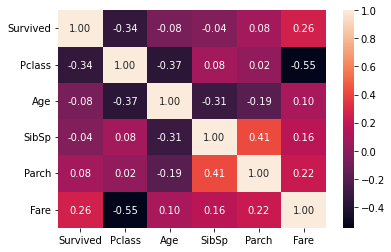

In [88]:
features = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
sns.heatmap(train_data[features].corr(), annot = True, fmt = ".2f")
plt.show()

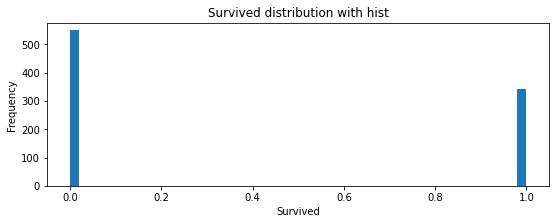

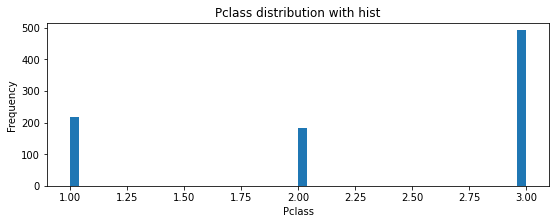

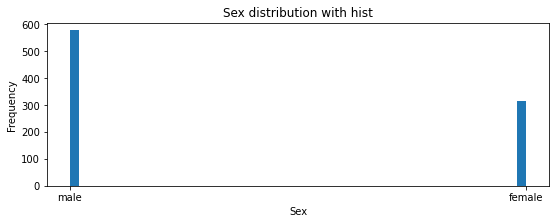

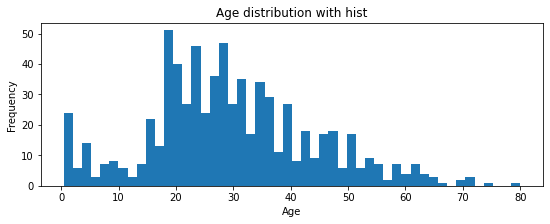

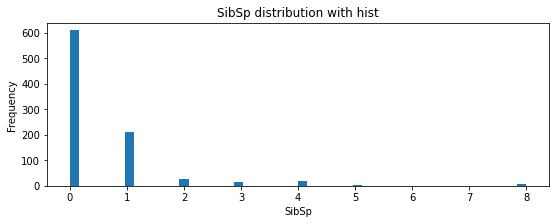

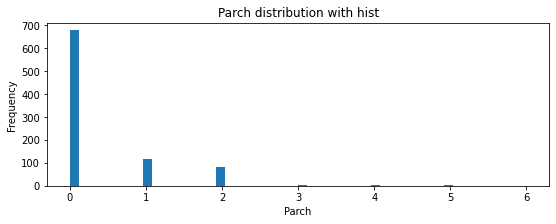

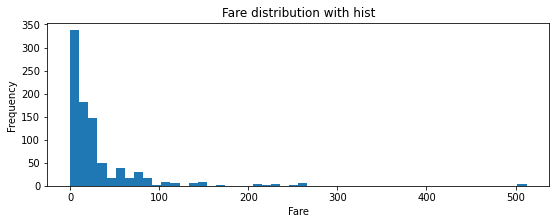

In [89]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show() 
for n in features:
    plot_hist(n)

In [90]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [91]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

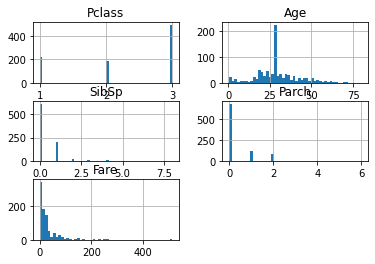

In [102]:
x_train.hist(bins=50)

In [92]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [93]:
x_columns=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

In [95]:
y_columns = train_data.columns[1]

In [119]:
x_train = train_data[x_columns]
y_train = train_data[y_columns]
x_test = test_data[x_columns]
y_test = answer_data[y_columns]

In [120]:
x_train["Age"]=x_train["Age"].fillna(x_train['Age'].median())
x_test["Age"]=x_test["Age"].fillna(x_train['Age'].median())
x_test["Fare"]=x_test["Fare"].fillna(x_train["Fare"].median())

/tmp/ipykernel_181/3505001765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["Age"]=x_train["Age"].fillna(x_train['Age'].median())
/tmp/ipykernel_181/3505001765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Age"]=x_test["Age"].fillna(x_train['Age'].median())
/tmp/ipykernel_181/3505001765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [121]:
x_train["Sex"] = x_train["Sex"].map({'male':0,
                                     'female':1})
x_test["Sex"] = x_test["Sex"].map({'male':0,
                                   'female':1})

/tmp/ipykernel_181/858449054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["Sex"] = x_train["Sex"].map({'male':0,
/tmp/ipykernel_181/858449054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Sex"] = x_test["Sex"].map({'male':0,


In [122]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(x_train)
x_train_np = min_max_scaler.transform(x_train)
x_test_np = min_max_scaler.transform(x_test)

In [123]:
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [136]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])

In [137]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [138]:
model.fit(x_train, y_train, epochs=30, batch_size=1)

Epoch 1/30
891/891 [==============================] - 1s 928us/step - loss: 0.7152 - accuracy: 0.6420
Epoch 2/30
891/891 [==============================] - 1s 935us/step - loss: 0.6206 - accuracy: 0.6790
Epoch 3/30
891/891 [==============================] - 1s 933us/step - loss: 0.5922 - accuracy: 0.7116
Epoch 4/30
891/891 [==============================] - 1s 927us/step - loss: 0.5572 - accuracy: 0.7228
Epoch 5/30
891/891 [==============================] - 1s 904us/step - loss: 0.5160 - accuracy: 0.7565
Epoch 6/30
891/891 [==============================] - 1s 910us/step - loss: 0.5121 - accuracy: 0.7688
Epoch 7/30
891/891 [==============================] - 1s 912us/step - loss: 0.5046 - accuracy: 0.7699
Epoch 8/30
891/891 [==============================] - 1s 892us/step - loss: 0.5047 - accuracy: 0.7912
Epoch 9/30
891/891 [==============================] - 1s 894us/step - loss: 0.4681 - accuracy: 0.7924
Epoch 10/30
891/891 [==============================] - 1s 918us/step - loss: 0.467

In [140]:
model.evaluate(x_test,y_test, verbose=2)

14/14 - 0s - loss: 0.3036 - accuracy: 0.9234 - 24ms/epoch - 2ms/step


[0.3036140203475952, 0.9234449863433838]

array([1.        , 0.        , 0.75496356, 0.        , 0.        ,
       0.02821272])